# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202304 
## SECTION: Correlation
### VIDEO: Correlation matrix
#### TEACHER: Mike X Cohen, sincxpress.com

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import numpy.matlib as matlib

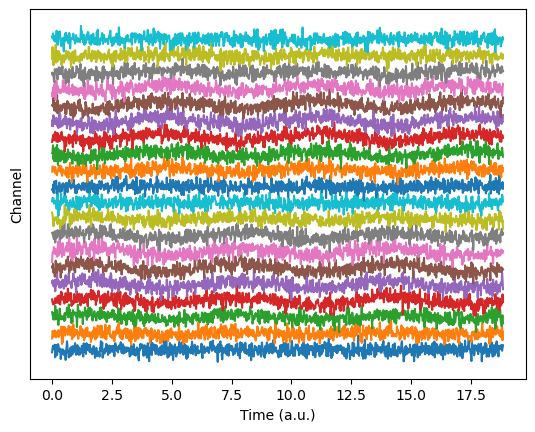

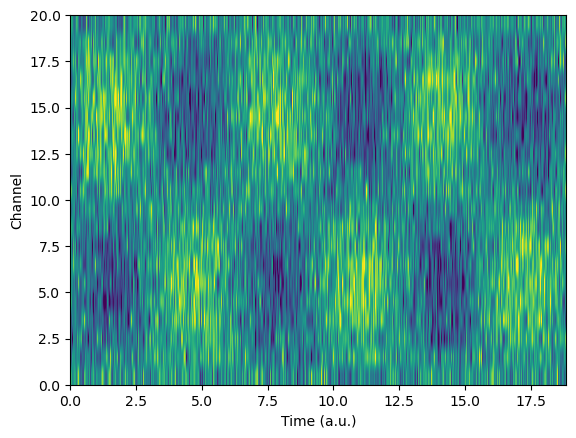

In [8]:
## simulate data

# simulation parameters (similar to timeseries - 20 different sources of readings over 1000 time points)
N = 1000  # time points - like in a timeseries
M =   20  # channels - multiple variables

# time vector (radian units)
t = np.linspace(0,6*np.pi,N) # arbitrary formula for line space range

# channel relationships (imposing covariance)
chanrel = np.sin(np.linspace(0,2*np.pi,M)) # defined by a sin wave which gives us the up and down pattern

# create the data
data = np.zeros((M,N))
# note this creates noiseless data
for mi in range(M):
    data[mi,:] = np.sin(t) * chanrel[mi] # sin wave gives up and down pattern 

data = data + np.random.randn(M,N) # this just adds some random noise to the data
    

# two ways of visualizing the multichannel data
for i in range(M):
    plt.plot(t,data[i,:]+i*4)

# plot channels stacked on top of each other
# this plot will show some channels that are positively and negatively correlated (based on when they go up or down)
plt.yticks([]) # removes y axis tick marks - not needed
plt.xlabel('Time (a.u.)')
plt.ylabel('Channel')
plt.show()

# showing a colorized matrix - positive correlation will be yellower and negative is bluish color
plt.imshow(data,aspect='auto',vmin=-2,vmax=2,extent=[t[0],t[-1],0,M])
plt.xlabel('Time (a.u.)')
plt.ylabel('Channel')
plt.show()

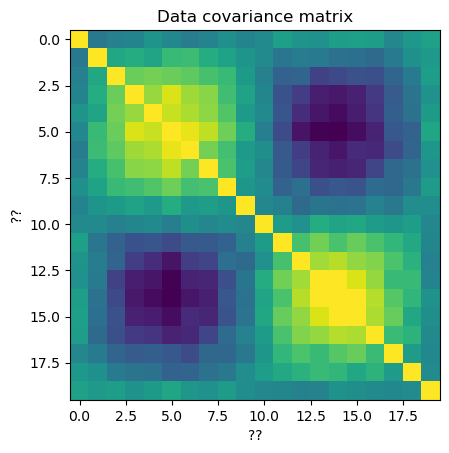

In [10]:
## now compute the covariance matrix

# note the size of the output! 1000x1000 instead of 20x20
dataCovMat = np.cov(data.T) # we transpose the matrix with .T to rotate the matrix - swap rows and cols (rows become cols and cols become rows), so we transform to time (y) by channels (x), or time by time matrix
# This shows the time matrix, so you need to be careful what data and how it's arranged when using .cov()

# we do not want to transpose to see the channels matrix, so:
dataCovMat = np.cov(data) # remove .T to get the channel covariance matrix, this shows what we expect which is groups of positively correlated channels (yellow) and negatively correlated ones (purple)


plt.imshow(dataCovMat,vmin=-.5,vmax=.5) # color scale fixed to be from -.5 to +.5
plt.title('Data covariance matrix')
plt.xlabel('??') # could be channel or time depending on transform (if using data.T then it is time x time)
plt.ylabel('??')
plt.show()

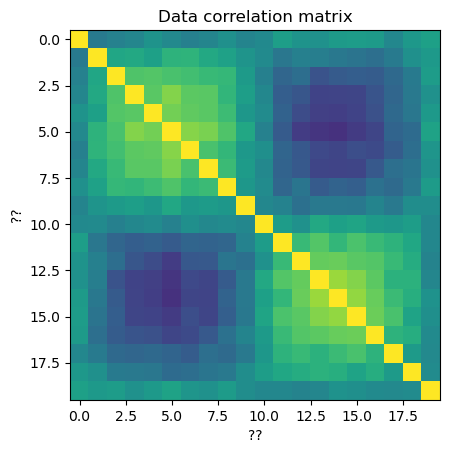

In [11]:
## and now the correlation matrix

# note the size of the output!
dataCorrMat = np.corrcoef(data)

# reason for diagnal line of variance (1): https://www.udemy.com/course/statsml_x/learn/lecture/20025112#questions/19325388

plt.imshow(dataCorrMat,vmin=-.5,vmax=.5)
plt.title('Data correlation matrix')
plt.xlabel('??')
plt.ylabel('??')
plt.show()